In [1]:
from gradient_descent import gradient_descent
from one_dimensional import dichotomy_method, fibonacci_method, golden_ratio_method
import matplotlib.pyplot as plt
import numpy as np
import itertools
from math import ceil, floor

In [6]:
f = lambda x: 3 * x**12 + (x - 12)**7 + (x - 37)**3 - (x + 32)**2 + 7
f_grad = lambda x: 36 * x**11 + 7 * (x - 12)**6 + 3 * (x - 37)**2 - 2 * (x + 32)
    
start_arg = -2
methods = [dichotomy_method, golden_ratio_method, fibonacci_method]
iteration_amount = []

for method in methods:
    res = gradient_descent(f, f_grad, start_arg, method, step=None, eps=1e-10)
    print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')
    iteration_amount.append(len(res))

method: dichotomy_method result: -4.131703548206929 iterations: 10001
method: golden_ratio_method result: -3.9271566607669812 iterations: 10001
method: fibonacci_method result: -4.097617172926546 iterations: 10001


In [7]:
def make_level_lines_plot(f, f_grad, start, method, x_min, x_max, y_min, y_max, levels, x_step=0.1, y_step=0.1):
    trace = gradient_descent(f, f_grad, start, method)
    print(f'result: {trace[-1]}', f'iterations: {len(trace)}')
    if levels is None:
        levels = [f(args) for args in trace]
        list.sort(levels)
        
    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[f(np.array([x, y])) for x in x_s] for y in y_s])

    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=levels)
    plt.clabel(cs)
    
    colors = itertools.cycle(["r", "g", "b"])
    plt.scatter([trace[0][0]], [trace[0][1]], color=next(colors))
    for i in range(len(trace) - 1):
        cur_point = trace[i]
        next_point = trace[i + 1]
        plt.scatter([next_point[0]], [next_point[1]], color=next(colors))
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]], color="cyan")
    plt.grid()
    plt.show()

In [8]:
sum_squares_f = lambda args: np.sum(args ** 2)
sum_squares_grad = lambda args: 2 * args

result: [6.42566077e-15 6.42566077e-15] iterations: 4


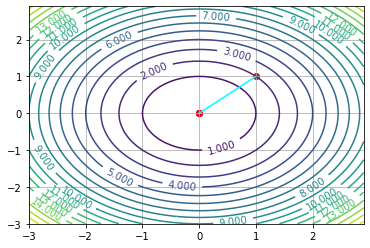

In [9]:
make_level_lines_plot(sum_squares_f,
              sum_squares_grad,
              start=np.array([1, 1]),
              method=golden_ratio_method,
              x_min=-3,
              x_max=3,
              y_min=-3,
              y_max=3,
              levels = 20
             )

In [10]:
def some_f(arg):
    x = arg[0]
    y = arg[1]
    return (x - 2) ** 2 + (y - 1) ** 2

def some_f_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (x - 2)
    dy = 2 * (y - 1)
    return np.array([dx, dy])

result: [2. 1.] iterations: 4


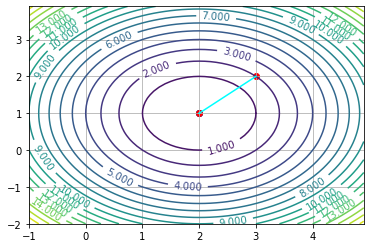

In [11]:
make_level_lines_plot(some_f,
              some_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-1,
              x_max=5,
              y_min=-2,
              y_max=4,
              levels=20
             )

result: [1.00000193 1.00000174] iterations: 121


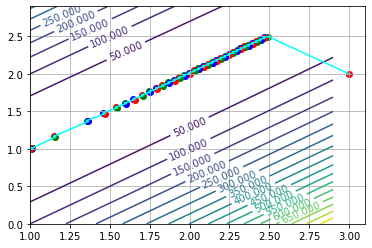

In [16]:
def another_f(args):
    x = args[0]
    y = args[1]
    return 100 * (y - x) ** 2 + (1 - x) ** 2

def another_f_grad(args):
    x = args[0]
    y = args[1]
    return np.array([-200 * (y - x) + 2 * x - 2, 200 * (y - x)])

make_level_lines_plot(another_f,
              another_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=1,
              x_max=3,
              y_min=0,
              y_max=3,
              levels=20
             )

result: [0.99999186 0.99998366] iterations: 262


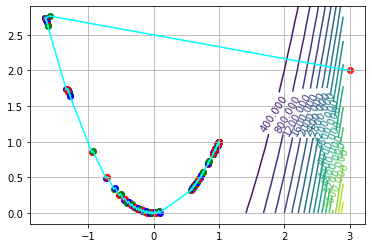

In [18]:
def some_f(args):
    x = args[0]
    y = args[1]
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

def some_f_grad(args):
    x = args[0]
    y = args[1]
    return np.array([-400 * (y - x ** 2) * x - 2 * (1 - x), 200 * (y - x ** 2)])

make_level_lines_plot(some_f,
              some_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=1,
              x_max=3,
              y_min=0,
              y_max=3,
              levels=20
             )